In [57]:
# UNAD Santiago Cepeda Vargas - Regresión Lineal - Car Details V4
# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [25]:
#Instalamos las bibliotecas necesarias
!pip install pandas numpy scikit-learn matplotlib

In [211]:
#Importamos las librerías necesarias
import numpy as np #Librerias para el cálculo numérico y el análisis de datos
import pandas as pd #Librerias para el manejo y análisis de estructuras de datos
import seaborn as sns #Librerias para la creación de gráficos estadísticos
import matplotlib.pyplot as plt #Librerias para creación de gráficos en dos dimensiones
#Librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
#Cargamos el dataset "car details v4" para la regresión lineal
data = pd.read_csv('C:/Users/Usuario/Desktop/ANALISIS DE DATOS/Datasets/Anexo 2 - Dataset Vehicle/car details v4.csv')

In [325]:
# Mostrar las primeras filas del dataset para entender su estructura
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [327]:
#Visualizamos la descripción de los datos
data.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

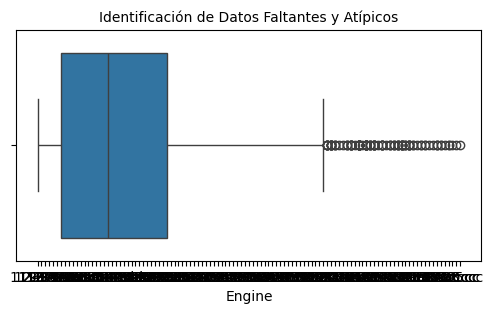

In [153]:
#Identificamos los datos faltantes y atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Engine'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [ ]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [155]:
#Revisamos si existen datos faltantes en las columnas que seleccionamos para estudiar, 
print("Cantidad de Registros Vacios en MAKE: ",data['Make'].isnull().sum())
print("Cantidad de Registros Vacios en YEAR: ",data['Year'].isnull().sum())
print("Cantidad de Registros Vacios en FUEL TYPE: ",data['Fuel Type'].isnull().sum())
print("Cantidad de Registros Vacios TRANSMISSION: ",data['Transmission'].isnull().sum())
print("Cantidad de Registros Vacios en ENGINE: ",data['Engine'].isnull().sum())

Cantidad de Registros Vacios en MAKE:  0
Cantidad de Registros Vacios en YEAR:  0
Cantidad de Registros Vacios en FUEL TYPE:  0
Cantidad de Registros Vacios TRANSMISSION:  0
Cantidad de Registros Vacios en ENGINE:  0


In [85]:
#Debido a que solo la columna "Engine" muestra celdas vacías, las reemplazamos con el valor "Desconocido"
data['Engine'].fillna('Desconocido', inplace=True)

In [91]:
#Revisamos de nuevo la columna "Engine" 
print("Cantidad de Registros Vacios en ENGINE: ",data['Engine'].isnull().sum())

Cantidad de Registros Vacios en ENGINE:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

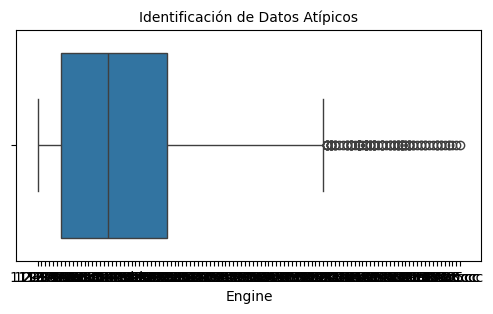

In [93]:
#Identificamos datos atípicos en las columnas

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Engine'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [99]:
#Revisamos la información del dataset, comprobando en total si existen datos atipicos o faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              2059 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [107]:
#3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

#Características a tomar en cuenta:
#Predecir el Precio del automovil en base a sus atributos. 
#Se toman el atriburo Year para determinar los precios de autos actuales y predecir que precio puede tener en promedio un auto de X año. 

In [123]:
#Calculamos el promedio de precio para los autos por decadas. De 1980 a 1989 - De 1990 a 1999 - De 2000 a 2009 - De 2010 a 2019 y de 2020 a 2029
#Filtramos los datos para cada decada
decade1_data = data[(data['Year'] >= 1980) & (data['Year'] <= 1989)]
decade2_data = data[(data['Year'] >= 1990) & (data['Year'] <= 1999)]
decade3_data = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]
decade4_data = data[(data['Year'] >= 2010) & (data['Year'] <= 2019)]
decade5_data = data[(data['Year'] >= 2020) & (data['Year'] <= 2029)]
#Y calculamos el promedio de precio para cada decada calculada (redondeando el resultado sin decimales)
decade1_price = round(decade1_data['Price'].mean(),0)
decade2_price = round(decade2_data['Price'].mean(),0)
decade3_price = round(decade3_data['Price'].mean(),0)
decade4_price = round(decade4_data['Price'].mean(),0)
decade5_price = round(decade5_data['Price'].mean(),0)
#Mostramos los promedios calculados
print("\nPrecio promedio de los autos entre los años 1980 y 1989:")
print(decade1_price)
print("\nPrecio promedio de los autos entre los años 1990 y 1999:")
print(decade2_price)
print("\nPrecio promedio de los autos entre los años 2000 y 2009:")
print(decade3_price)
print("\nPrecio promedio de los autos entre los años 2010 y 2019:")
print(decade4_price)
print("\nPrecio promedio de los autos entre los años 2020 y 2029:")
print(decade5_price)


Precio promedio de los autos entre los años 1980 y 1989:
1300000.0

Precio promedio de los autos entre los años 1990 y 1999:
130000.0

Precio promedio de los autos entre los años 2000 y 2009:
339579.0

Precio promedio de los autos entre los años 2010 y 2019:
1409432.0

Precio promedio de los autos entre los años 2020 y 2029:
3216504.0


In [125]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [329]:
#Convertimos a dataframe
df = pd.DataFrame(data)
#Preprocesamos los datos, asignando a las variables X y Y la información del entrenamiento
X = data[['Year']] #Variable base en la que predecir
y = data['Price'] #Variable objetivo para predecir
#Dividimos el dataset en entrenamiento y prueba, usando un 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Mostramos el train X
print(X_train)

      Year
266   2012
1133  2016
1823  2017
1370  2021
67    2019
...    ...
1638  2016
1095  2014
1130  2017
1294  2014
860   2018

[1647 rows x 1 columns]


In [297]:
#Mostramos el train y
print(y_train)

266       800000
1133     2199000
1823      800000
1370    12900000
67       3499000
          ...   
1638      635000
1095      777000
1130      369000
1294     2280000
860       422000
Name: Price, Length: 1647, dtype: int64


In [135]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros

In [340]:
# Creamos el modelo de regresión linear
model = LinearRegression()
# Entrenamos el modelo
model.fit(X_train, y_train)

LinearRegression()

In [319]:
#Realizamos las predicciones para dos años aleatorios
new_X = np.array([[1988], [2015]])  # Nuevos años a predecir
y_pred = model.predict(new_X)

# Mostramos las predicciones
print("\nPredicciones:")
for i, pred in enumerate(y_pred):
    print(f"Predicción {i+1} para (Año: {new_X[i][0]}): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Año: 1988): -4495707.03 USD
Predicción 2 para (Año: 2015): 1387347.87 USD


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [181]:
#6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [305]:
#7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

Intercepto (β0): -437662860.5867793
Coeficiente (Año, β1): [217890.92231218]


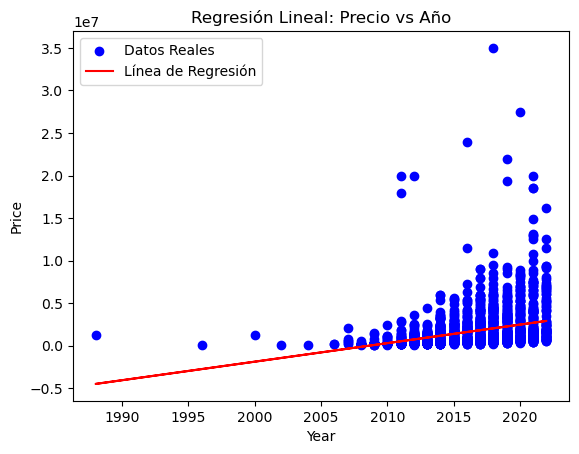

In [309]:
#Establecemos los coeficientes de la regresión
beta_0 = model.intercept_  # Intercepto
beta_1 = model.coef_  # Pendientes (Año y Precio)

#Mostramos los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Año, β1): {beta_1}")

#Visualizamos la regresión (opcional para datos simples)
plt.scatter(df['Year'], y, color='blue', label='Datos Reales')
plt.plot(df['Year'], model.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Precio vs Año')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [185]:
#8.Interpretar, analizar y documentar los resultados obtenidos.

In [338]:
#Análisis de Resultados
#Al evaluar los resultados, considera lo siguiente:

#Tendencias en Precios por Décadas: Observa si hay tendencias notables en los precios promedio a través de las décadas. 
#Por ejemplo, si los precios han aumentado significativamente en las últimas décadas, esto puede estar relacionado con factores económicos, 
#inflación o cambios en la demanda de autos.

#Comparación con Predicciones: Compara las predicciones con los precios reales (si tienes esos datos) para evaluar la precisión del modelo.

#Impacto de Variables Externas: Recuerda que el precio de los autos puede estar influenciado por diversos factores (económicos, sociales, 
#tecnológicos), así que es importante contextualizar los resultados dentro de un marco más amplio.

#Limitaciones del Modelo: La regresión lineal asume una relación lineal entre las variables. Si los datos muestran una tendencia no lineal, 
#podría ser necesario considerar modelos más complejos.